In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to the range [-1, 1]
])

# Download and load the Fashion MNIST training dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Download and load the Fashion MNIST test dataset
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

# Define batch size for training and testing
batch_size = 64

# Create dataloaders for training and testing datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 15621615.60it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 251067.55it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4961068.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 56672643.02it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FashionCNNModel(nn.Module):
    def __init__(self):
        super(FashionCNNModel, self).__init__()
        
        # Convolutional Layer 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.batch_norm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()  # Add ReLU layer
        
        # Max Pooling Layer 1
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Convolutional Layer 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.batch_norm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()  # Add ReLU layer
        
        # Max Pooling Layer 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully Connected Layer 1
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.batch_norm3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()  # Add ReLU layer
        
        # Output Layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Convolutional Layer 1
        x = self.pool1(self.relu1(self.batch_norm1(self.conv1(x))))
        
        # Convolutional Layer 2
        x = self.pool2(self.relu2(self.batch_norm2(self.conv2(x))))
        
        # Flatten Layer
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully Connected Layer 1
        x = self.relu3(self.batch_norm3(self.fc1(x)))
        
        # Output Layer
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)

# Create an instance of the FashionCNNModel
fashion_model = FashionCNNModel()

# Print the model architecture
print(fashion_model)

FashionCNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (batch_norm3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim
# Move the model to the CUDA device if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
fashion_model = FashionCNNModel().to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer (using SGD optimizer)
optimizer = optim.SGD(fashion_model.parameters(), lr=0.01, momentum=0.9)

# Number of training iterations
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Iterate over the training dataset
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # Move inputs and labels to the CUDA device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = fashion_model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print('[%d, %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Training finished!')

cuda
[1,   100] Loss: 0.634
[1,   200] Loss: 0.393
[1,   300] Loss: 0.346
[1,   400] Loss: 0.323
[1,   500] Loss: 0.302
[1,   600] Loss: 0.274
[1,   700] Loss: 0.278
[1,   800] Loss: 0.269
[1,   900] Loss: 0.270
[2,   100] Loss: 0.239
[2,   200] Loss: 0.240
[2,   300] Loss: 0.227
[2,   400] Loss: 0.222
[2,   500] Loss: 0.227
[2,   600] Loss: 0.231
[2,   700] Loss: 0.223
[2,   800] Loss: 0.223
[2,   900] Loss: 0.223
[3,   100] Loss: 0.179
[3,   200] Loss: 0.182
[3,   300] Loss: 0.185
[3,   400] Loss: 0.191
[3,   500] Loss: 0.178
[3,   600] Loss: 0.181
[3,   700] Loss: 0.184
[3,   800] Loss: 0.204
[3,   900] Loss: 0.203
[4,   100] Loss: 0.154
[4,   200] Loss: 0.163
[4,   300] Loss: 0.162
[4,   400] Loss: 0.155
[4,   500] Loss: 0.149
[4,   600] Loss: 0.155
[4,   700] Loss: 0.161
[4,   800] Loss: 0.170
[4,   900] Loss: 0.160
[5,   100] Loss: 0.122
[5,   200] Loss: 0.131
[5,   300] Loss: 0.126
[5,   400] Loss: 0.137
[5,   500] Loss: 0.135
[5,   600] Loss: 0.138
[5,   700] Loss: 0.137
[5,   

In [5]:
# Evaluate the model on the test set
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    correct_predictions = 0
    total_samples = 0
    total_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to the CUDA device if available
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            
            # Calculate the loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Get predictions
            _, predicted = torch.max(outputs, 1)

            # Update the count of correct predictions
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = correct_predictions / total_samples
    average_loss = total_loss / len(test_loader)

    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    print(f'Average Test Loss: {average_loss:.4f}')

# Assuming your fashion_model, criterion, and test_loader are already defined
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Evaluate the model on the test set
evaluate_model(fashion_model, test_loader, criterion)

Test Accuracy: 91.69%
Average Test Loss: 0.2764


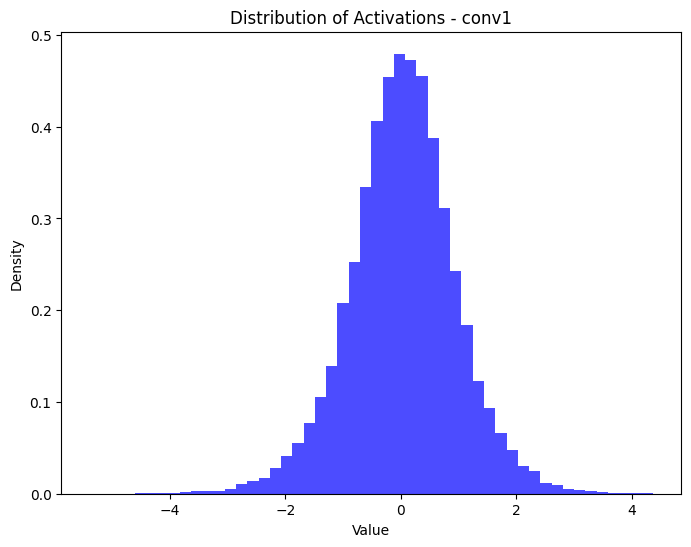

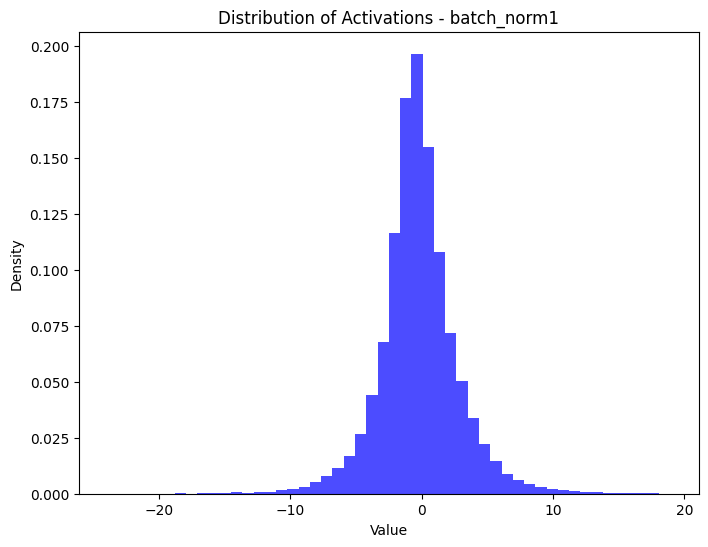

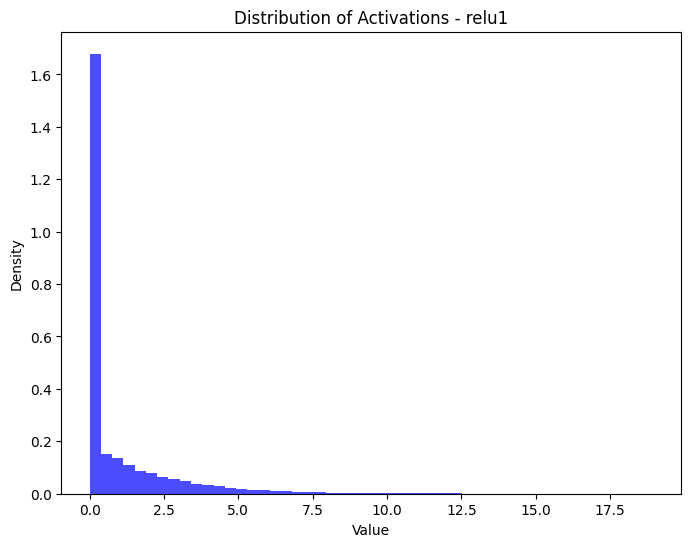

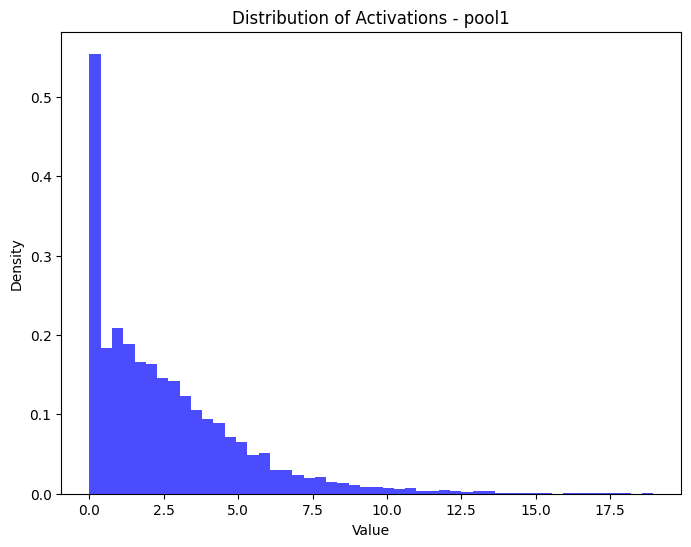

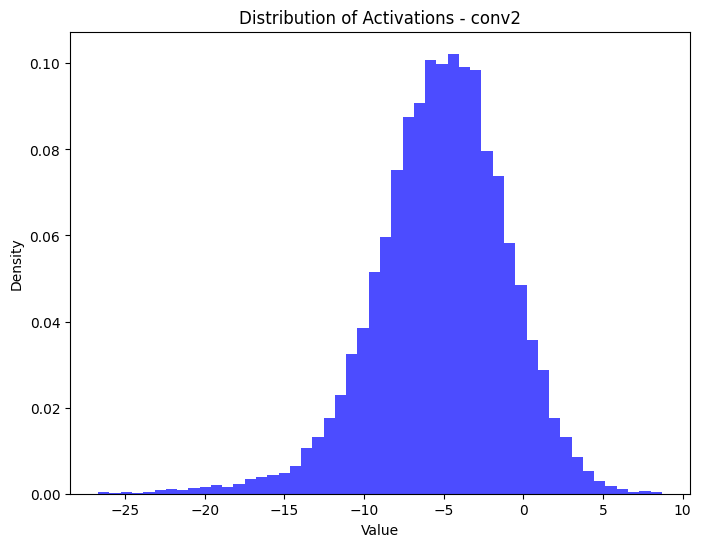

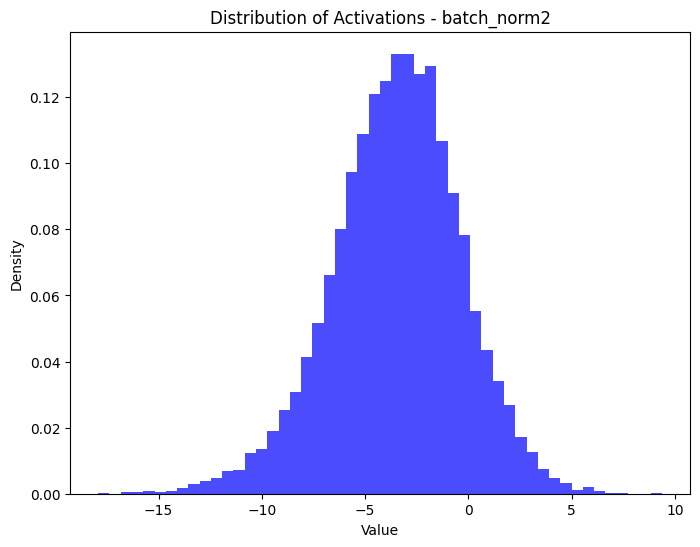

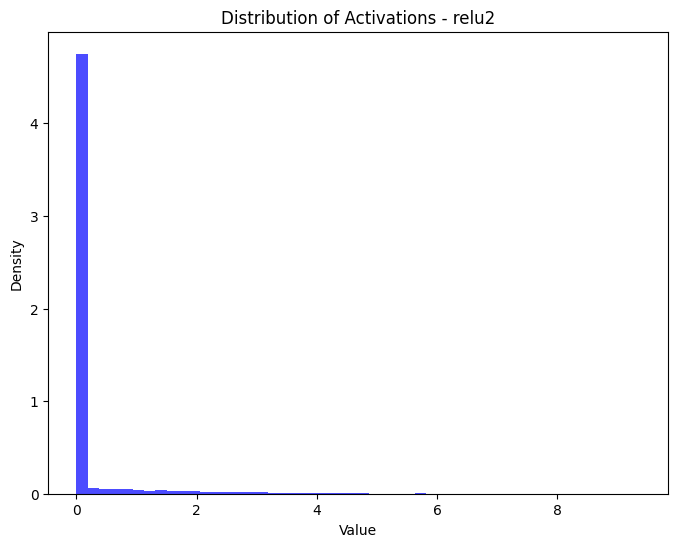

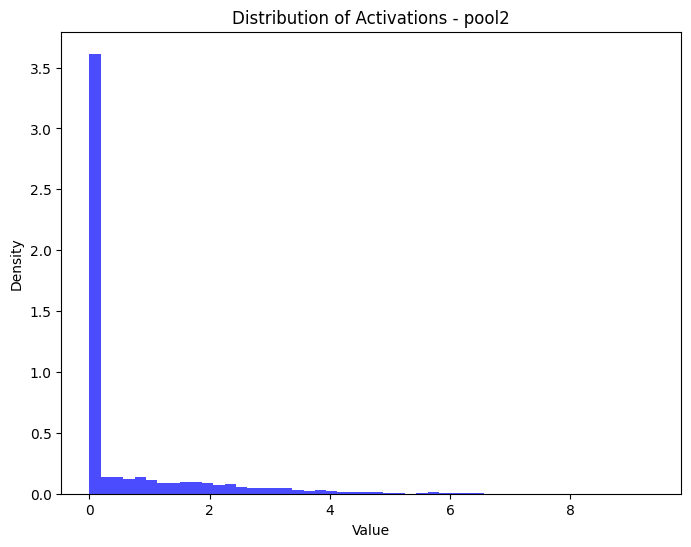

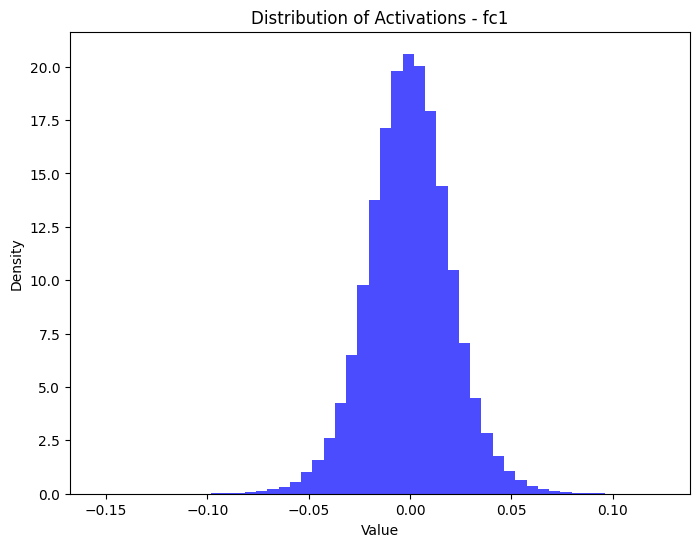

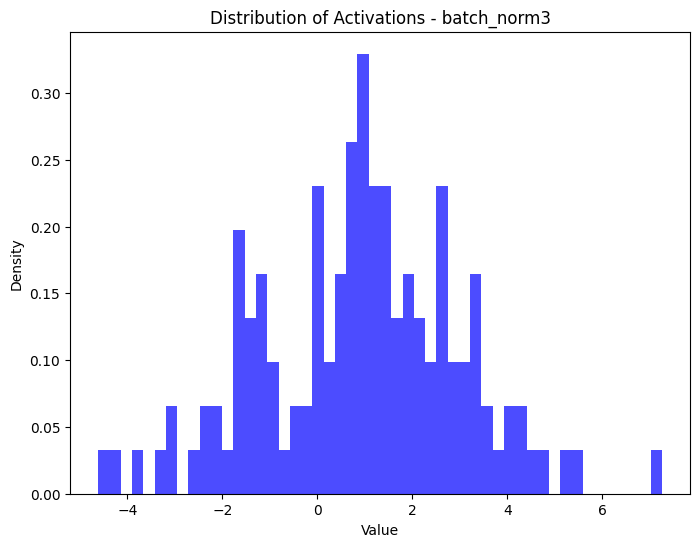

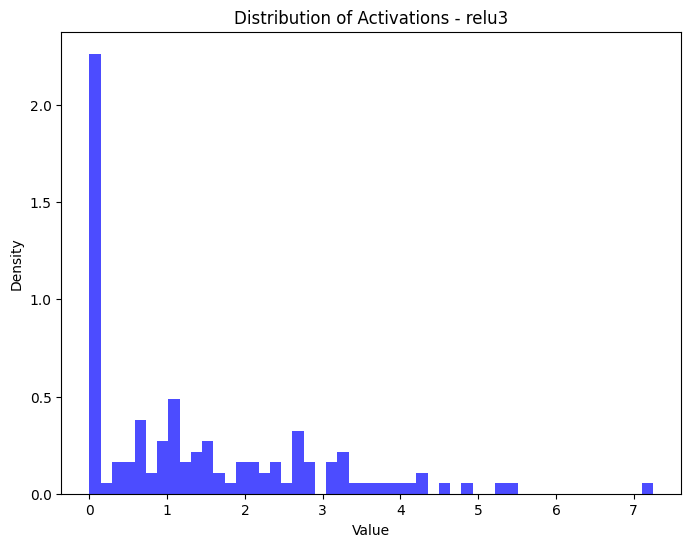

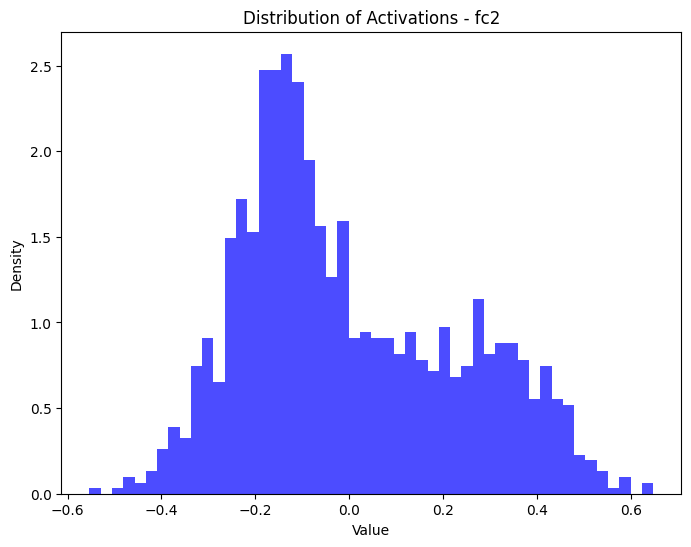

In [8]:
import matplotlib.pyplot as plt

# Generate random input data for visualization
dummy_input = torch.randn(1, 1, 32, 32)  # Batch size of 10
dummy_input_BN1D = torch.randn(1, 128)
# Forward pass to capture activations
activations = []

with torch.no_grad():
    for layer_name, layer in fashion_model.named_children():
        if isinstance(layer, nn.Conv2d) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.BatchNorm2d) or isinstance(layer, nn.MaxPool2d):
            dummy_input = layer(dummy_input.to(device))
            activation = dummy_input.clone().detach().cpu().numpy()
            plt.figure(figsize=(8, 6))
            plt.hist(activation.flatten(), bins=50, density=True, alpha=0.7, color='blue')
            plt.title(f'Distribution of Activations - {layer_name}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.show()
        elif isinstance(layer, nn.BatchNorm1d):
            dummy_input = layer(dummy_input_BN1D.to(device))
            activation = dummy_input.clone().detach().cpu().numpy()
            plt.figure(figsize=(8, 6))
            plt.hist(activation.flatten(), bins=50, density=True, alpha=0.7, color='blue')
            plt.title(f'Distribution of Activations - {layer_name}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.show()
        else:
            plt.figure(figsize=(8, 6))
            plt.hist(layer.weight.flatten().cpu().numpy(), bins=50, density=True, alpha=0.7, color='blue')
            plt.title(f'Distribution of Activations - {layer_name}')
            plt.xlabel('Value')
            plt.ylabel('Density')
            plt.show()

conv1 filters


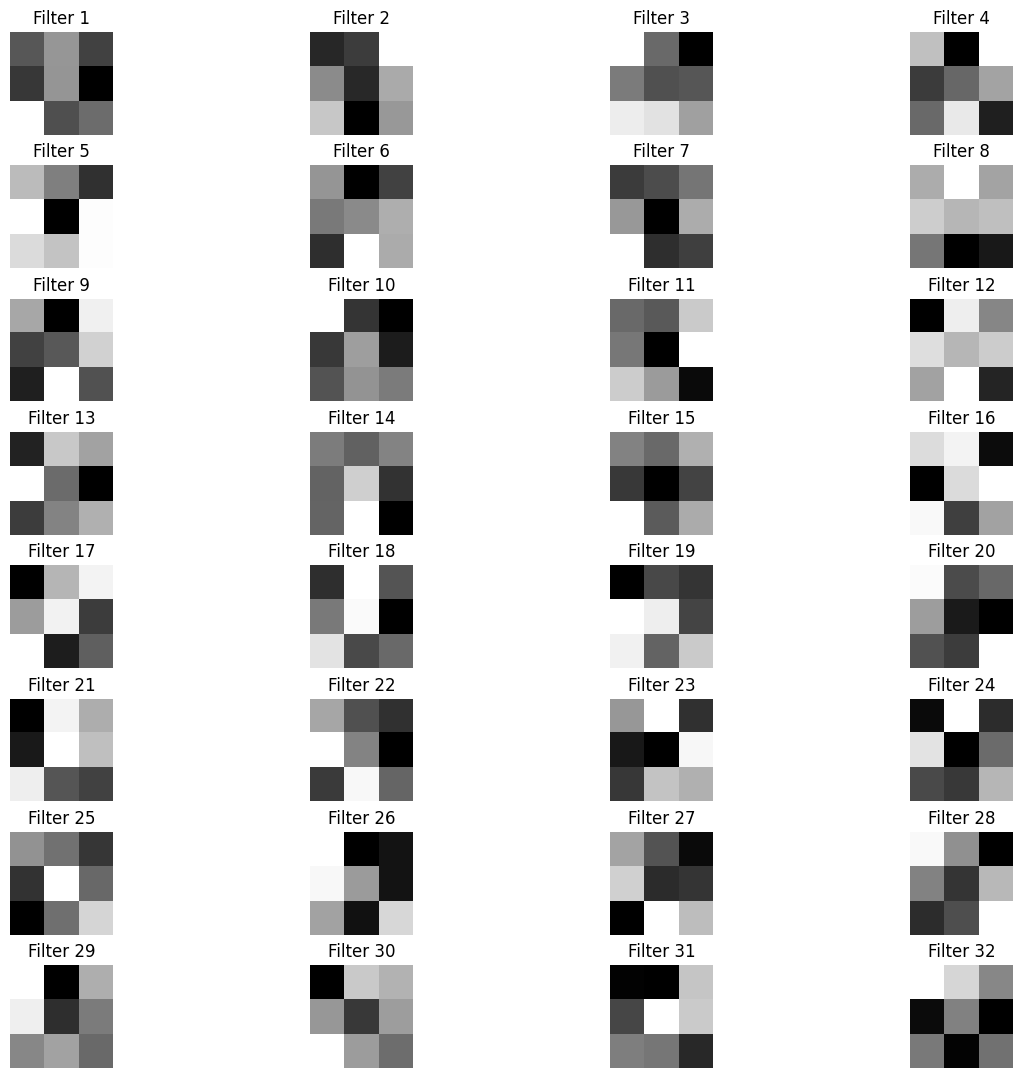

conv2 filters


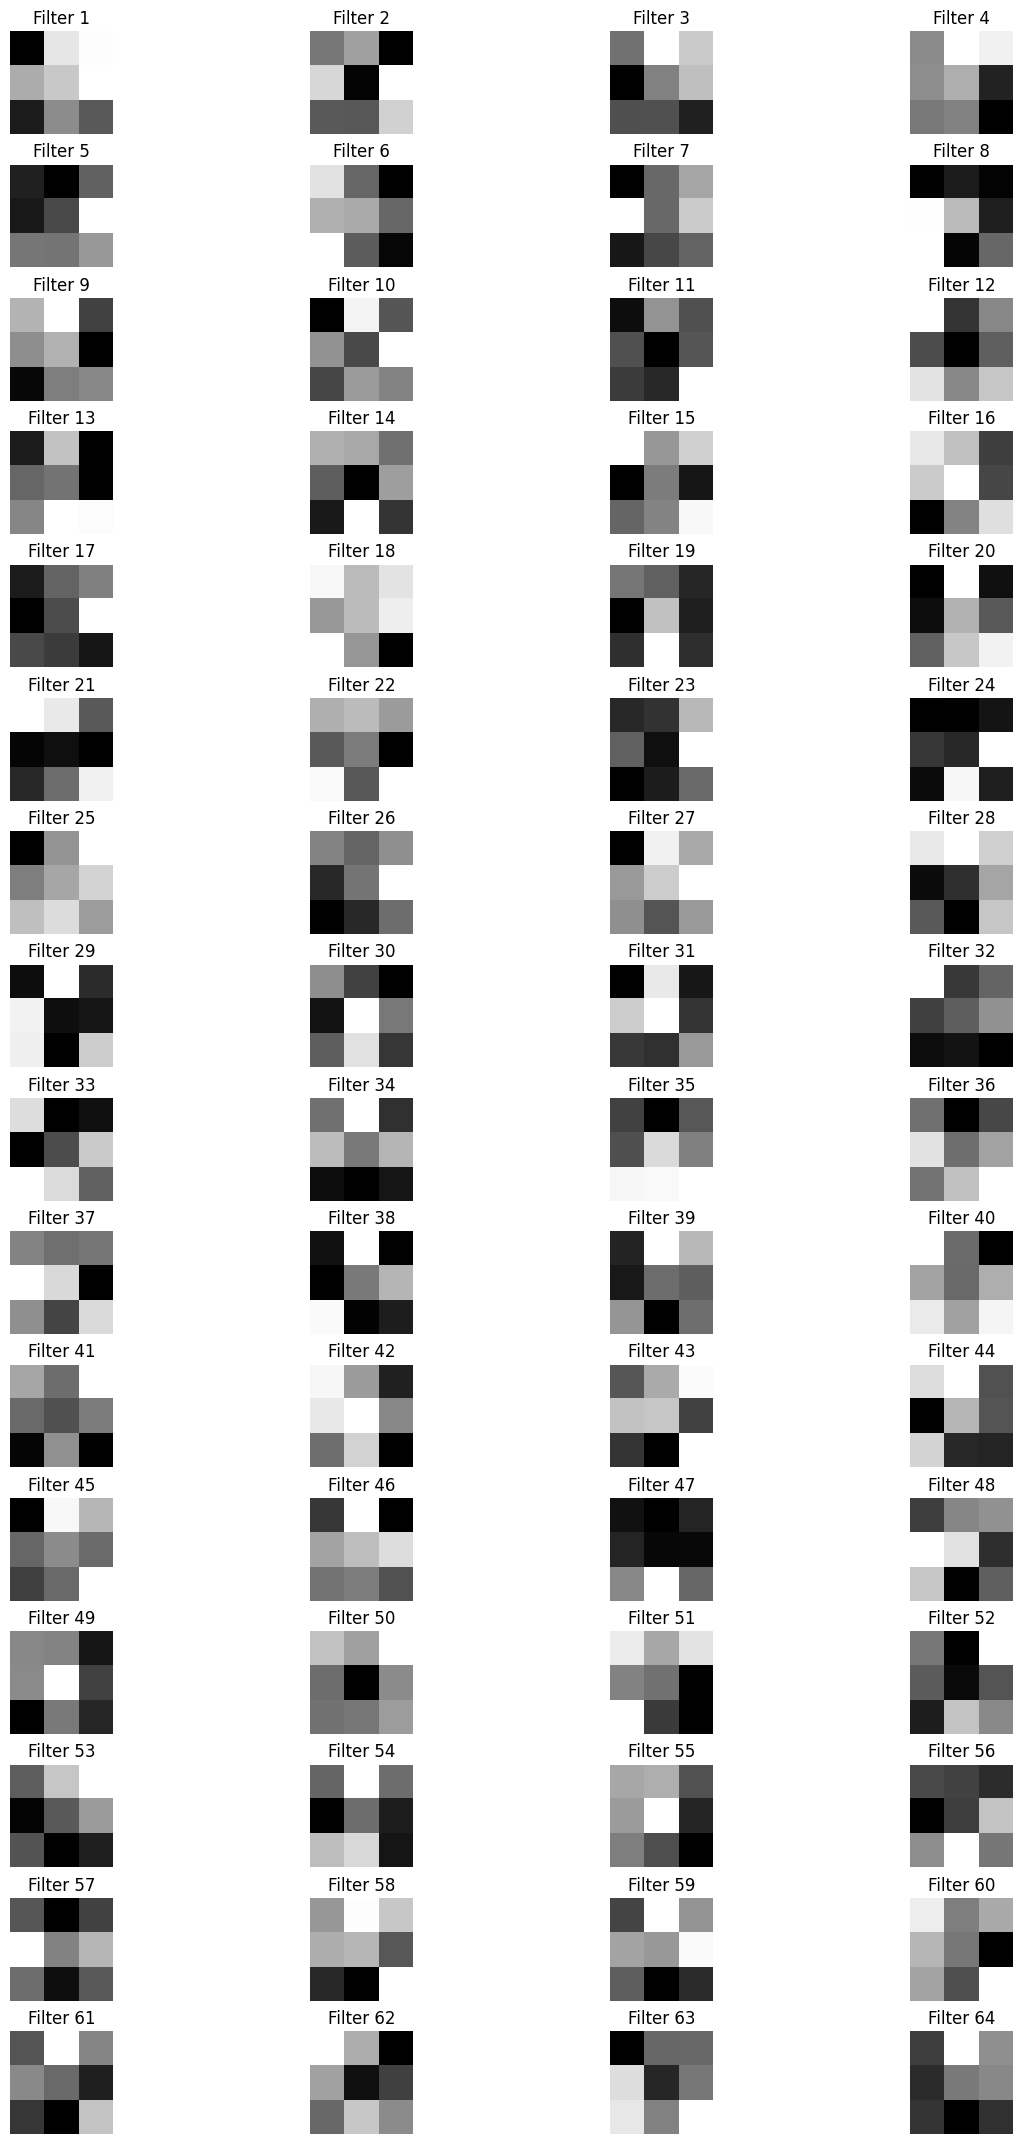

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the filter kernels
def visualize_kernels(model, layer_name, num_kernels=6):
    # Extract the weights from the specified layer
    layer_weights = model._modules[layer_name].weight.data.cpu().numpy()

    # Get the number of input channels for the layer
    num_input_channels = layer_weights.shape[1]

    # Specify a fixed number of columns for subplots
    num_cols = 4

    # Calculate the number of rows needed based on the number of kernels and columns
    num_rows = int(np.ceil(num_kernels / num_cols))

    # Adjust the figure size based on the number of rows
    figsize = (12, 8 * (num_rows / 6))  # Adjust the multiplier based on your preference

    # Create a figure and subplots with adjusted layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, constrained_layout=True)

    # Plot the filter kernels
    for i in range(num_kernels):
        # Calculate the position in the subplot grid
        row_idx = i // num_cols
        col_idx = i % num_cols

        # Extract the filter from each kernel
        kernel = layer_weights[i, 0]

        # Plot the kernel as a grayscale image with filter number label
        axes[row_idx, col_idx].imshow(kernel, cmap='gray', aspect='equal')  # Set aspect ratio to 'equal'
        axes[row_idx, col_idx].axis('off')
        axes[row_idx, col_idx].set_title(f'Filter {i + 1}')

    # Remove empty subplots
    for i in range(num_kernels, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.show()

# Assuming you have a Convnet model
num_classes = 10  # Replace with the number of classes in your specific task

# Visualize the filter kernels in the first convolutional layer (conv1)
print("conv1 filters")
visualize_kernels(fashion_model, 'conv1', num_kernels=32)

# Visualize the filter kernels in the second convolutional layer (conv2)
print("conv2 filters")
visualize_kernels(fashion_model, 'conv2', num_kernels=64)